In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Se não tem baixado a ultima versão, descomente a linha abaixo:
#!wget https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/2021/part-00000-33cc8f2d-3f49-40bc-97eb-953ba00dda90-c000.csv

In [150]:
df = pd.read_csv('part-00000-33cc8f2d-3f49-40bc-97eb-953ba00dda90-c000.csv')
df = df.dropna()
df['paciente_idade'] = df.paciente_idade.astype(np.int)
df['vacina_dataAplicacao'] = df.vacina_dataAplicacao.astype(np.datetime64)

In [152]:
df.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumNacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoAtendimento_codigo',
       'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem'],
      dtype='object')

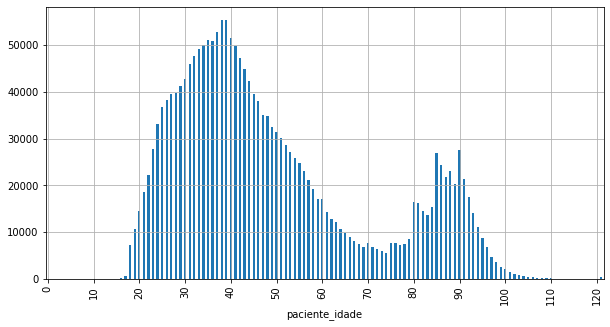

In [179]:
plt.figure(figsize=(10,5))
ax = df.groupby('paciente_idade')['document_id'].count().plot.bar(x='paciente_idade', y='count', grid=True)
ax.set_xticks(np.array(range(13))*10)
ax = ax.set_xticklabels(np.array(range(13))*10)

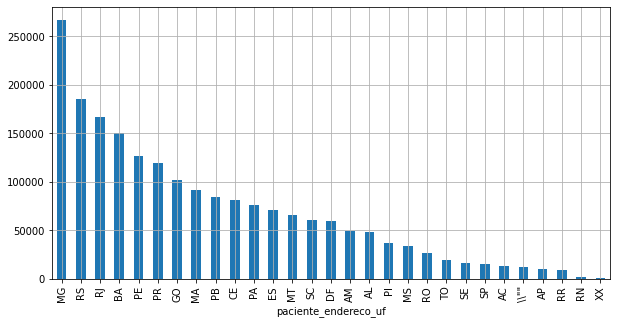

In [178]:
plt.figure(figsize=(10,5))
por_uf = df.groupby('paciente_endereco_uf')['document_id'].count()
ax = por_uf.sort_values(ascending=False).plot.bar(grid=True)

<AxesSubplot:xlabel='vacina_categoria_nome'>

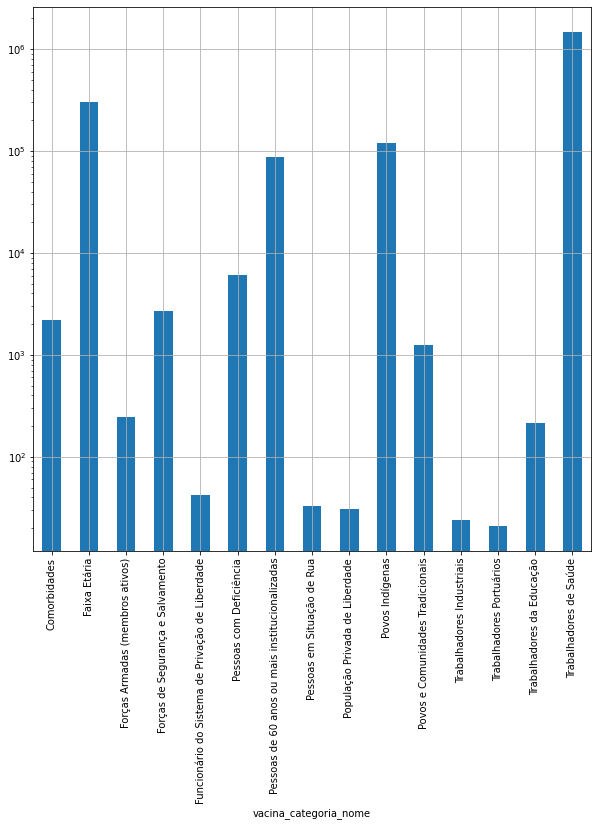

In [175]:
plt.figure(figsize=(10,5))
df.groupby('vacina_categoria_nome')['document_id'].count().plot.bar(logy=True, grid=True)

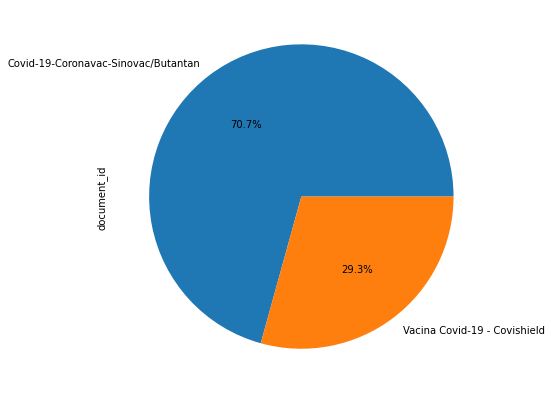

In [190]:
plt.figure(figsize=(7,7))
ax = df.groupby('vacina_nome')['document_id'].count().plot.pie(autopct='%1.1f%%')

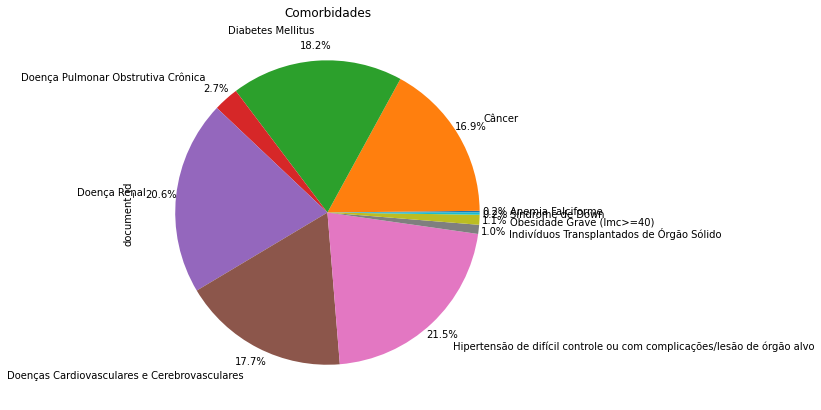

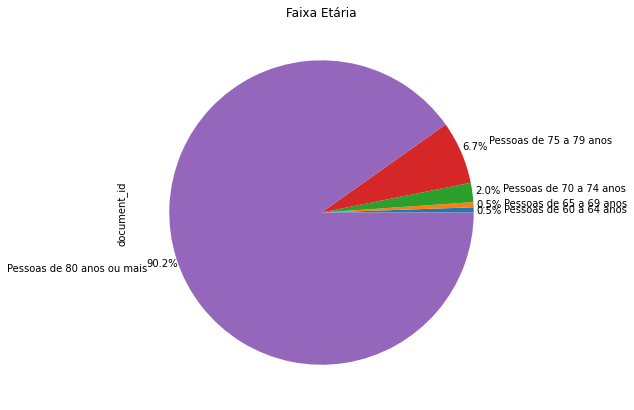

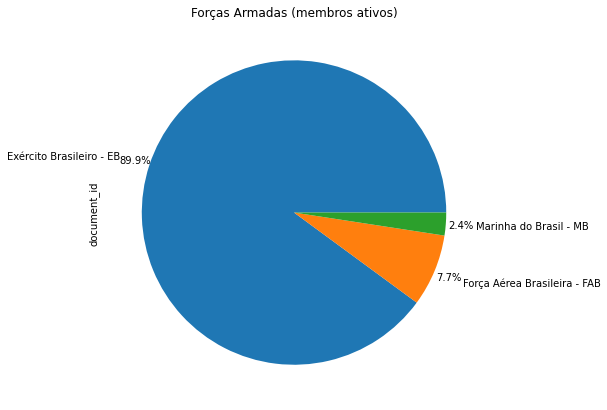

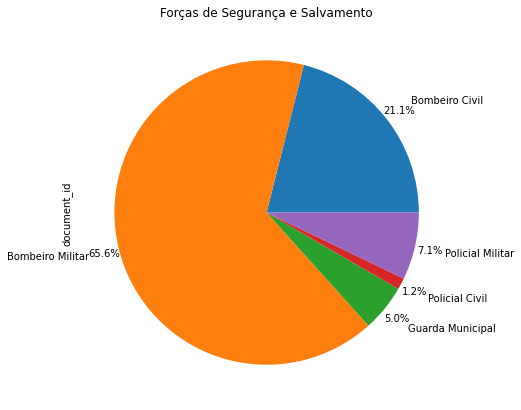

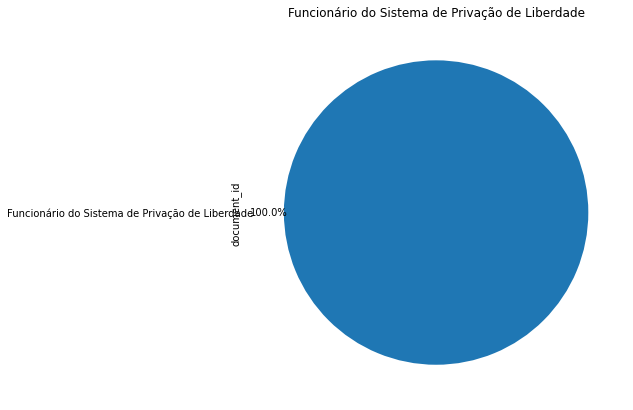

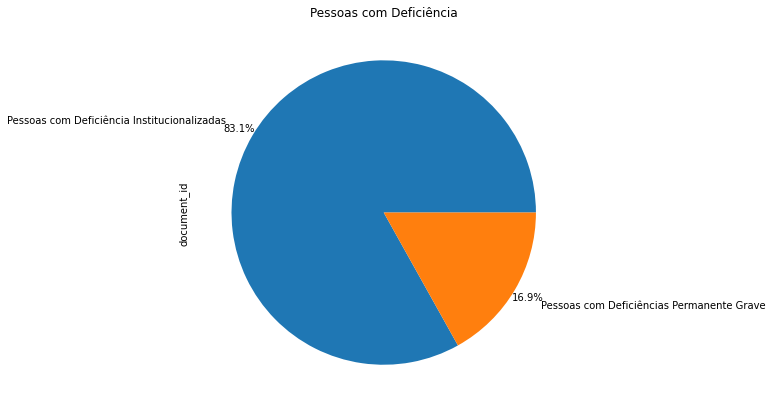

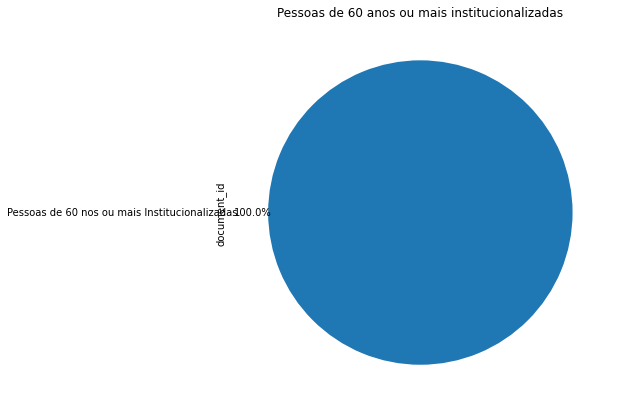

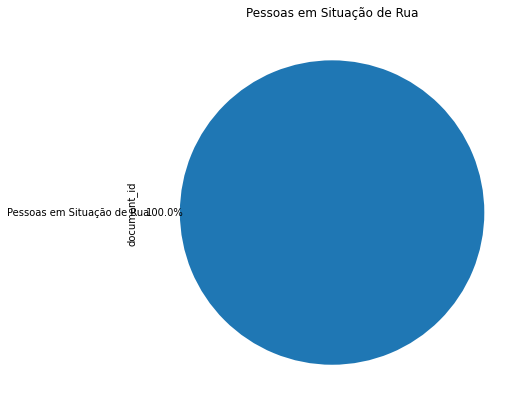

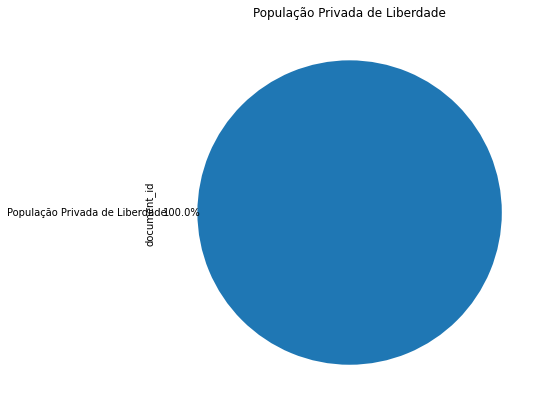

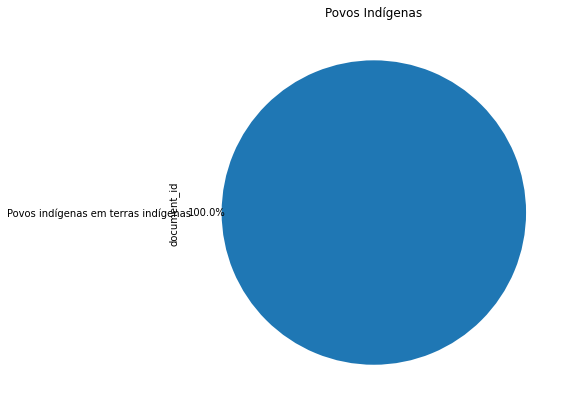

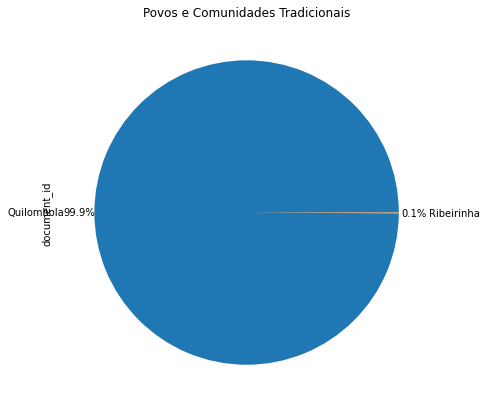

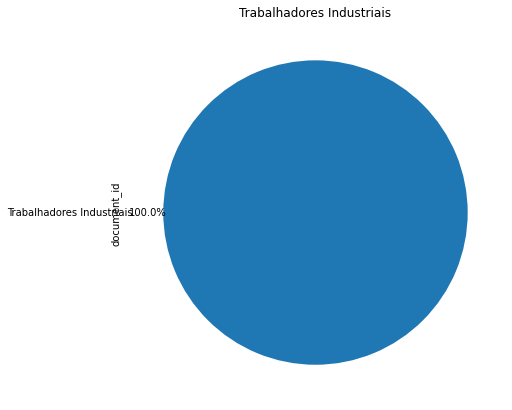

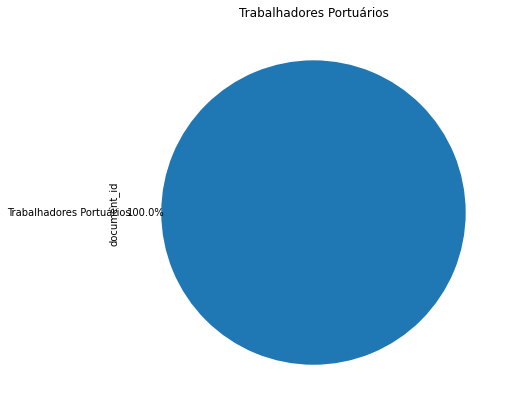

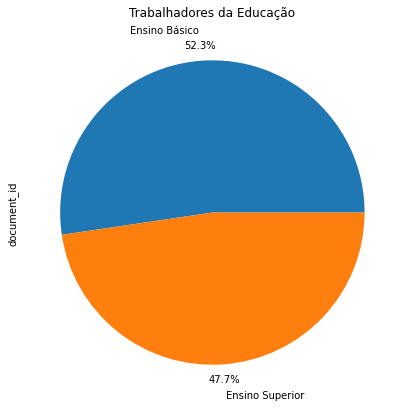

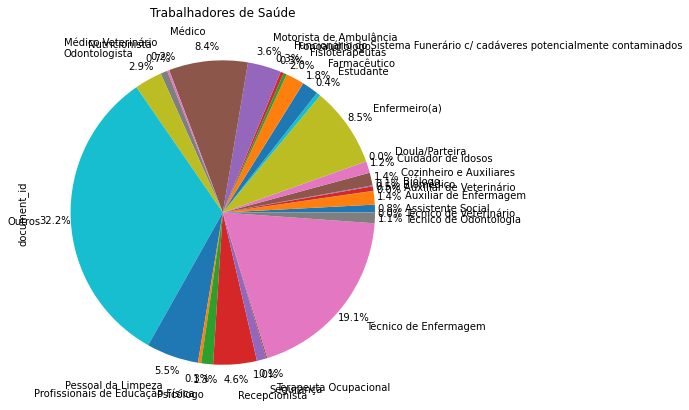

In [191]:
for i, (categoria, group_categoria) in enumerate(df.groupby('vacina_categoria_nome')):
    plt.figure(figsize=(7,7))
    group_categoria.groupby('vacina_grupoAtendimento_nome')['document_id'].count().plot.pie(title=categoria, autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)

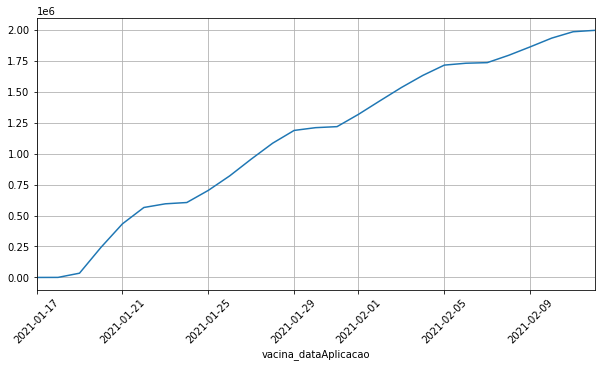

In [192]:
plt.figure(figsize=(10,5))
ax = df.groupby(by=df['vacina_dataAplicacao'].dt.date)['document_id'].count().cumsum().plot.line(rot='45', grid=True)

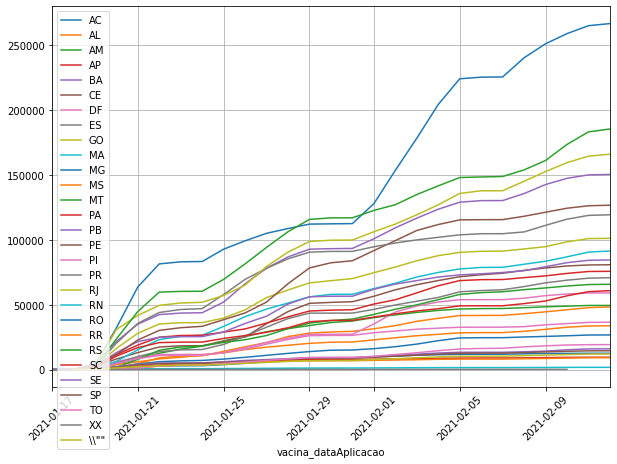

In [196]:
plt.figure(figsize=(10,7))
ax = None
for uf, grpb_uf in df.groupby('paciente_endereco_uf'):
    ax = grpb_uf.groupby(by=df['vacina_dataAplicacao'].dt.date)['document_id'].count().cumsum().plot.line(rot='45', label=uf, grid=True, legend=True, ax=ax)

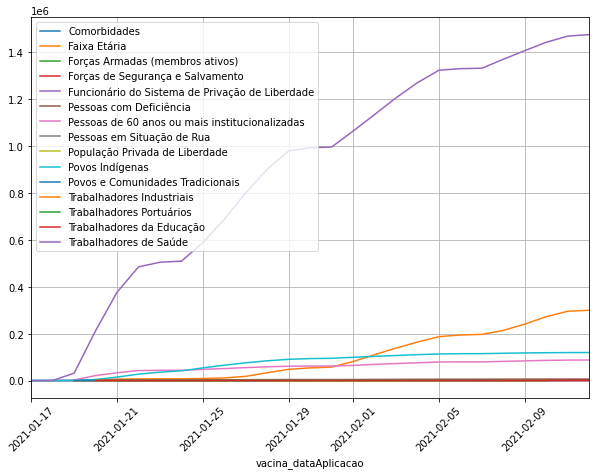

In [199]:
plt.figure(figsize=(10,7))
ax = None
for uf, grpb_uf in df.groupby('vacina_categoria_nome'):
    ax = grpb_uf.groupby(by=df['vacina_dataAplicacao'].dt.date)['document_id'].count().cumsum().plot.line(rot='45', label=uf, grid=True, legend=True, ax=ax)